Importación de librerias

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Análisis EDA para el archivo "HECHO"

#### Importar los datos

In [56]:
ruta_archivo = "DataSet/hecho.csv"
df_hecho = pd.read_csv(ruta_archivo)
df_hecho.head(1)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO


## Tipo de datos del df

Crear un funcion para analizar el tipo de datos proporcionados

In [57]:
# Funcion para revisar el tipo de dato de cada variable del dataset 
def tipo_datos(df):
    mi_dict = {"nombre_campo": [], "tipo_datos": []}
    for columna in df.columns:
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
    df_info = pd.DataFrame(mi_dict)
    return df_info

In [58]:
tipo_datos(df_hecho)

,nombre_campo,tipo_datos
0,ID,[<class 'str'>]
1,N_VICTIMAS,[<class 'int'>]
2,FECHA,[<class 'str'>]
3,AAAA,[<class 'int'>]
4,MM,[<class 'int'>]
5,DD,[<class 'int'>]
6,HORA,[<class 'str'>]
7,HH,[<class 'str'>]
8,LUGAR_DEL_HECHO,[<class 'str'>]
9,TIPO_DE_CALLE,[<class 'str'>]


Renombrar columnas para facilitar el proceso de busqueda

In [59]:
df_hecho = df_hecho.rename(columns={'ID': 'ID_Accidente',
                                    'N_VICTIMAS': 'N_victima', 
                                    'FECHA': 'Fecha',
                                    'HORA': 'Hora',
                                    'TIPO_DE_CALLE': 'Tipo_de_calle',
                                    'LUGAR_DEL_HECHO': 'Lugar',
                                    'COMUNA': 'Comuna',
                                    'Dirección Normalizada' : 'Direccion_normalizada',
                                    'PARTICIPANTES': 'Participante',
                                    'VICTIMA': 'Victima',
                                    'ACUSADO': 'Acusado'})

## Valores Faltantes

Partiendo de que nuestros DataSet 'Hechos' tiene 696 filas x 21 Columnas

Se observa el numero de valores en cada columna. Lo cual nos muestra que las "Altura" y 'Cruce' son las que mas presentan valores NaN entre sus filas

In [60]:
# Ordenamos los columnas pore los que mas presentan valores faltantes 
df_hecho.isnull().sum().sort_values(ascending=False)

Altura                   567
Cruce                    171
Direccion_normalizada      8
Calle                      1
Victima                    0
Participante               0
pos y                      0
pos x                      0
XY (CABA)                  0
Comuna                     0
ID_Accidente               0
N_victima                  0
Tipo_de_calle              0
Lugar                      0
HH                         0
Hora                       0
DD                         0
MM                         0
AAAA                       0
Fecha                      0
Acusado                    0
dtype: int64

Observamos el valor de Nulos para las columnas antes mencionada 'Altura' y 'Cruce'

In [61]:
df_hecho[['Altura','Cruce']].isnull().sum()

Altura    567
Cruce     171
dtype: int64

Para ver si existe un tipo de relacion entre estas dos columanas se van a plantear 4 casos

In [62]:
# 1. Contar el número de valores no nulos de la columna 'Cruce' cuando 'Altura' presenta valores no nulos
num_valores_no_nulos_altura_no_nulos = df_hecho[df_hecho['Altura'].notnull()]['Cruce'].count()

# 2. Contar el número de valores nulos de la columna 'Cruce' cuando 'Altura' presenta valores no nulos
num_valores_nulos_altura_no_nulos = df_hecho[df_hecho['Altura'].notnull()]['Cruce'].isnull().sum()

# 3. Contar el número de valores no nulos de la columna 'Cruce' cuando 'Altura' presenta valores nulos
num_valores_no_nulos_altura_nulos = df_hecho[df_hecho['Altura'].isnull()]['Cruce'].count()

# 4. Contar el número de valores nulos de la columna 'Cruce' cuando 'Altura' presenta valores nulos
num_valores_nulos_altura_nulos = df_hecho[df_hecho['Altura'].isnull()]['Cruce'].isnull().sum()

print("1. Número de valores no nulos de 'Cruce' cuando 'Altura' presenta valores no nulos:", num_valores_no_nulos_altura_no_nulos)
print("2. Número de valores nulos de 'Cruce' cuando 'Altura' presenta valores no nulos:", num_valores_nulos_altura_no_nulos)
print("3. Número de valores no nulos de 'Cruce' cuando 'Altura' presenta valores nulos:", num_valores_no_nulos_altura_nulos)
print("4. Número de valores nulos de 'Cruce' cuando 'Altura' presenta valores nulos:", num_valores_nulos_altura_nulos)

1. Número de valores no nulos de 'Cruce' cuando 'Altura' presenta valores no nulos: 0
2. Número de valores nulos de 'Cruce' cuando 'Altura' presenta valores no nulos: 129
3. Número de valores no nulos de 'Cruce' cuando 'Altura' presenta valores nulos: 525
4. Número de valores nulos de 'Cruce' cuando 'Altura' presenta valores nulos: 42


Esto nos lleva a la conclusión de que las columnas "Calle" y "Cruce" no necesariamente están relacionadas. Ya que la falta de valores en la columna "Altura" no implica necesariamente la presencia de valores en la columna "Cruce" y viceversa. <br> 
Por esto no se puede generar un relación exacta entre estas variables que nos permita tomar un decision

Pasamos a observar la columna 'Direccion Normalizada' y vemos que esta esta compuesta por las columnas ['Calle', 'Altura', 'Cruce']

In [63]:
df_hecho[['Calle', 'Altura', 'Cruce','Direccion_normalizada']].sample(n=5)

,Calle,Altura,Cruce,Direccion_normalizada
574,INCLAN,NaN,ALBERTI,INCLAN y ALBERTI
686,MONROE,NaN,3 DE FEBRERO,MONROE y 3 DE FEBRERO
314,"FREIRE, RAMON, CAP. GRAL.",NaN,"OLAGUER Y FELIU, VIRREY","FREIRE, RAMON, CAP. GRAL. y OLAGUER Y FELIU, V..."
575,OLAZABAL AV.,5437.0,NaN,OLAZABAL AV. 5437
680,AUTOPISTA 25 DE MAYO,NaN,NaN,AUTOPISTA 25 DE MAYO y PASCO


In [64]:
#Filas donde 'Direccion Normalizada' tenga valores de tipo NaN 
nulos = df_hecho[df_hecho['Direccion_normalizada'].isnull()]
filas = nulos[['Calle', 'Altura', 'Cruce','Direccion_normalizada']]
filas

,Calle,Altura,Cruce,Direccion_normalizada
38,"LUGONES, LEOPOLDO AV.",NaN,NaN,NaN
106,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN
180,AUTOPISTA PERITO MORENO,NaN,NaN,NaN
181,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NaN,NaN,NaN
313,"LUGONES, LEOPOLDO AV.",NaN,NaN,NaN
546,"LUGONES, LEOPOLDO AV.",NaN,NaN,NaN
621,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,NaN,NaN


Podemos completar  7 de los 8 valores nulos que existen en Direccion Normalizada con el valor de la columna 'Calle'

In [65]:
# Completamos los valores faltantes y observamos que solo nos quede un nulo de los 8 existentes
df_hecho['Direccion_normalizada'].fillna(df_hecho['Calle'], inplace=True)
df_hecho['Direccion_normalizada'].isnull().sum()

1

Observamos los valores de las comunas y vemos que existen valores de cero. Lo cual es incorrecto ya que en Buenos Aires, existen 15 comunas de la 1-15.

In [66]:
df_hecho['Comuna'].unique()

array([ 8,  9,  1, 11, 15,  4,  7, 12,  3, 13, 14, 10,  6,  2,  5,  0],
      dtype=int64)

 Lamentablemente al intentar completar estos valores con las columnas como Lugar, Calle, Cruce, Direccion_normalizada no existe valores que nos permita realizar su corrección

## Valores Duplicados

Primero observo los valores unicos por columna para luego poder compararlos con los valores duplicados 

In [67]:
df_hecho.nunique().sort_values(ascending=False)

ID_Accidente             696
Lugar                    683
Direccion_normalizada    637
XY (CABA)                606
pos y                    605
pos x                    605
Fecha                    598
Hora                     346
Cruce                    317
Calle                    279
Altura                   126
Participante              41
DD                        31
HH                        25
Comuna                    16
MM                        12
Victima                   10
Acusado                   10
AAAA                       6
Tipo_de_calle              4
N_victima                  3
dtype: int64

Crear una funcion para observar los duplicados por columnas 

In [68]:
duplicados_por_columna = {}

# Iteramos sobre cada columna del DataFrame
for columna in df_hecho.columns:
    duplicados_por_valor = df_hecho[columna].duplicated().sum()
    duplicados_por_columna[columna] = duplicados_por_valor

ordenados = dict(sorted(duplicados_por_columna.items(), key=lambda x: x[1]))

for columna, recuento in ordenados.items():
    print(f"Columna '{columna}': {recuento} valores duplicados.")

Columna 'ID_Accidente': 0 valores duplicados.
Columna 'Lugar': 13 valores duplicados.
Columna 'Direccion_normalizada': 58 valores duplicados.
Columna 'XY (CABA)': 90 valores duplicados.
Columna 'pos x': 91 valores duplicados.
Columna 'pos y': 91 valores duplicados.
Columna 'Fecha': 98 valores duplicados.
Columna 'Hora': 350 valores duplicados.
Columna 'Cruce': 378 valores duplicados.
Columna 'Calle': 416 valores duplicados.
Columna 'Altura': 569 valores duplicados.
Columna 'Participante': 655 valores duplicados.
Columna 'DD': 665 valores duplicados.
Columna 'HH': 671 valores duplicados.
Columna 'Comuna': 680 valores duplicados.
Columna 'MM': 684 valores duplicados.
Columna 'Victima': 686 valores duplicados.
Columna 'Acusado': 686 valores duplicados.
Columna 'AAAA': 690 valores duplicados.
Columna 'Tipo_de_calle': 692 valores duplicados.
Columna 'N_victima': 693 valores duplicados.


Observaciones: 
1. El ID_Accidentes no presenta valores duplicados. Que es para este DataSet la única variable que no debería presentar valores repetidos
2. Se puede observar que en la variable 'Direccion_normalizada' existen 58 valores duplicados lo cual no quiero decir  que existan valores erróneos pero si nos da un indicio que en este punto de alta accidentalidad que se puede entrar a estudiar más adelante
3. La presencia de valores duplicados en la mayoria de columnas son comunes y esperados dentro del contexto de los datos recopilados al referirse a lugar,fechas, situaciones,etc de eventos.

Por lo tanto, se concluye que los valores duplicados presentes en el DataFrame no son necesariamente errores o datos incorrectos, sino más bien una representación precisa de la información recopilada. Estos duplicados son válidos y contribuyen a una comprensión completa de los eventos registrados que se estudiaran mas adelante.



## Outliers

In [69]:
tipos_de_datos = df_hecho.dtypes
tipos_de_datos

ID_Accidente              object
N_victima                  int64
Fecha                     object
AAAA                       int64
MM                         int64
DD                         int64
Hora                      object
HH                        object
Lugar                     object
Tipo_de_calle             object
Calle                     object
Altura                   float64
Cruce                     object
Direccion_normalizada     object
Comuna                     int64
XY (CABA)                 object
pos x                     object
pos y                     object
Participante              object
Victima                   object
Acusado                   object
dtype: object

In [70]:
# Separamos las columnas en variables numéricas y variables categóricas
variables_numericas = tipos_de_datos[tipos_de_datos != 'object'].index.tolist()
variables_categoricas = tipos_de_datos[tipos_de_datos == 'object'].index.tolist()
print("Variables numéricas:")
print(variables_numericas)
print("\nVariables categóricas:")
print(variables_categoricas)

Variables numéricas:
['N_victima', 'AAAA', 'MM', 'DD', 'Altura', 'Comuna']

Variables categóricas:
['ID_Accidente', 'Fecha', 'Hora', 'HH', 'Lugar', 'Tipo_de_calle', 'Calle', 'Cruce', 'Direccion_normalizada', 'XY (CABA)', 'pos x', 'pos y', 'Participante', 'Victima', 'Acusado']


Se observa que la variable 'HH' tambien deberia ser un variable numérica pero por alguna razon esta no es considera como tal 

In [71]:
df_hecho['HH'].unique()

array(['4', '1', '7', '0', '5', '18', '19', '15', '11', '22', '16', '9',
       '23', '6', '10', '17', '12', '8', '20', '21', '14', '3', '2', '13',
       'SD'], dtype=object)

In [72]:
#Se observa que solo aparece este valor una unica
(df_hecho['HH'] == 'SD').sum()

1

In [73]:
df_hecho[df_hecho['HH'] == 'SD']

,ID_Accidente,N_victima,Fecha,AAAA,MM,DD,Hora,HH,Lugar,Tipo_de_calle,...,Altura,Cruce,Direccion_normalizada,Comuna,XY (CABA),pos x,pos y,Participante,Victima,Acusado
518,2019-0103,1,12/18/2019,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,NaN,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


La columna 'HH' presenta un SD = Sin Dato. Al unicamente ser un valor, de una columna sin NaN se decide realizar una imputación ya que no se puede obtener la hora real del accidente, como la media, la mediana o el valor más común de la columna 'HH'.

In [74]:
media_horas = df_hecho['HH'][df_hecho['HH'] != 'SD'].astype(int).mean()
df_hecho['HH'] = df_hecho['HH'].replace('SD', np.round(media_horas).astype(int))
df_hecho['HH'] = df_hecho['HH'].astype('int64')
df_hecho['HH'].unique()


array([ 4,  1,  7,  0,  5, 18, 19, 15, 11, 22, 16,  9, 23,  6, 10, 17, 12,
        8, 20, 21, 14,  3,  2, 13], dtype=int64)

Repetimos el proceso de separar las columnas en variables numéricas y variables categóricas

In [75]:
tipos_de_datos_nuevos = df_hecho.dtypes
variables_numericas = tipos_de_datos_nuevos[tipos_de_datos_nuevos != 'object'].index.tolist()
variables_categoricas = tipos_de_datos_nuevos[tipos_de_datos_nuevos == 'object'].index.tolist()
print("Variables numéricas:")
print(variables_numericas)
print("\nVariables categóricas:")
print(variables_categoricas)

Variables numéricas:
['N_victima', 'AAAA', 'MM', 'DD', 'HH', 'Altura', 'Comuna']

Variables categóricas:
['ID_Accidente', 'Fecha', 'Hora', 'Lugar', 'Tipo_de_calle', 'Calle', 'Cruce', 'Direccion_normalizada', 'XY (CABA)', 'pos x', 'pos y', 'Participante', 'Victima', 'Acusado']


En este caso me quedo con las siguientes variables numericas para su estudio ['N_victima', 'AAAA', 'MM', 'DD', 'HH', 'Comuna']

In [76]:
columnas_numericas = ['N_victima', 'AAAA', 'MM', 'DD', 'HH', 'Comuna']

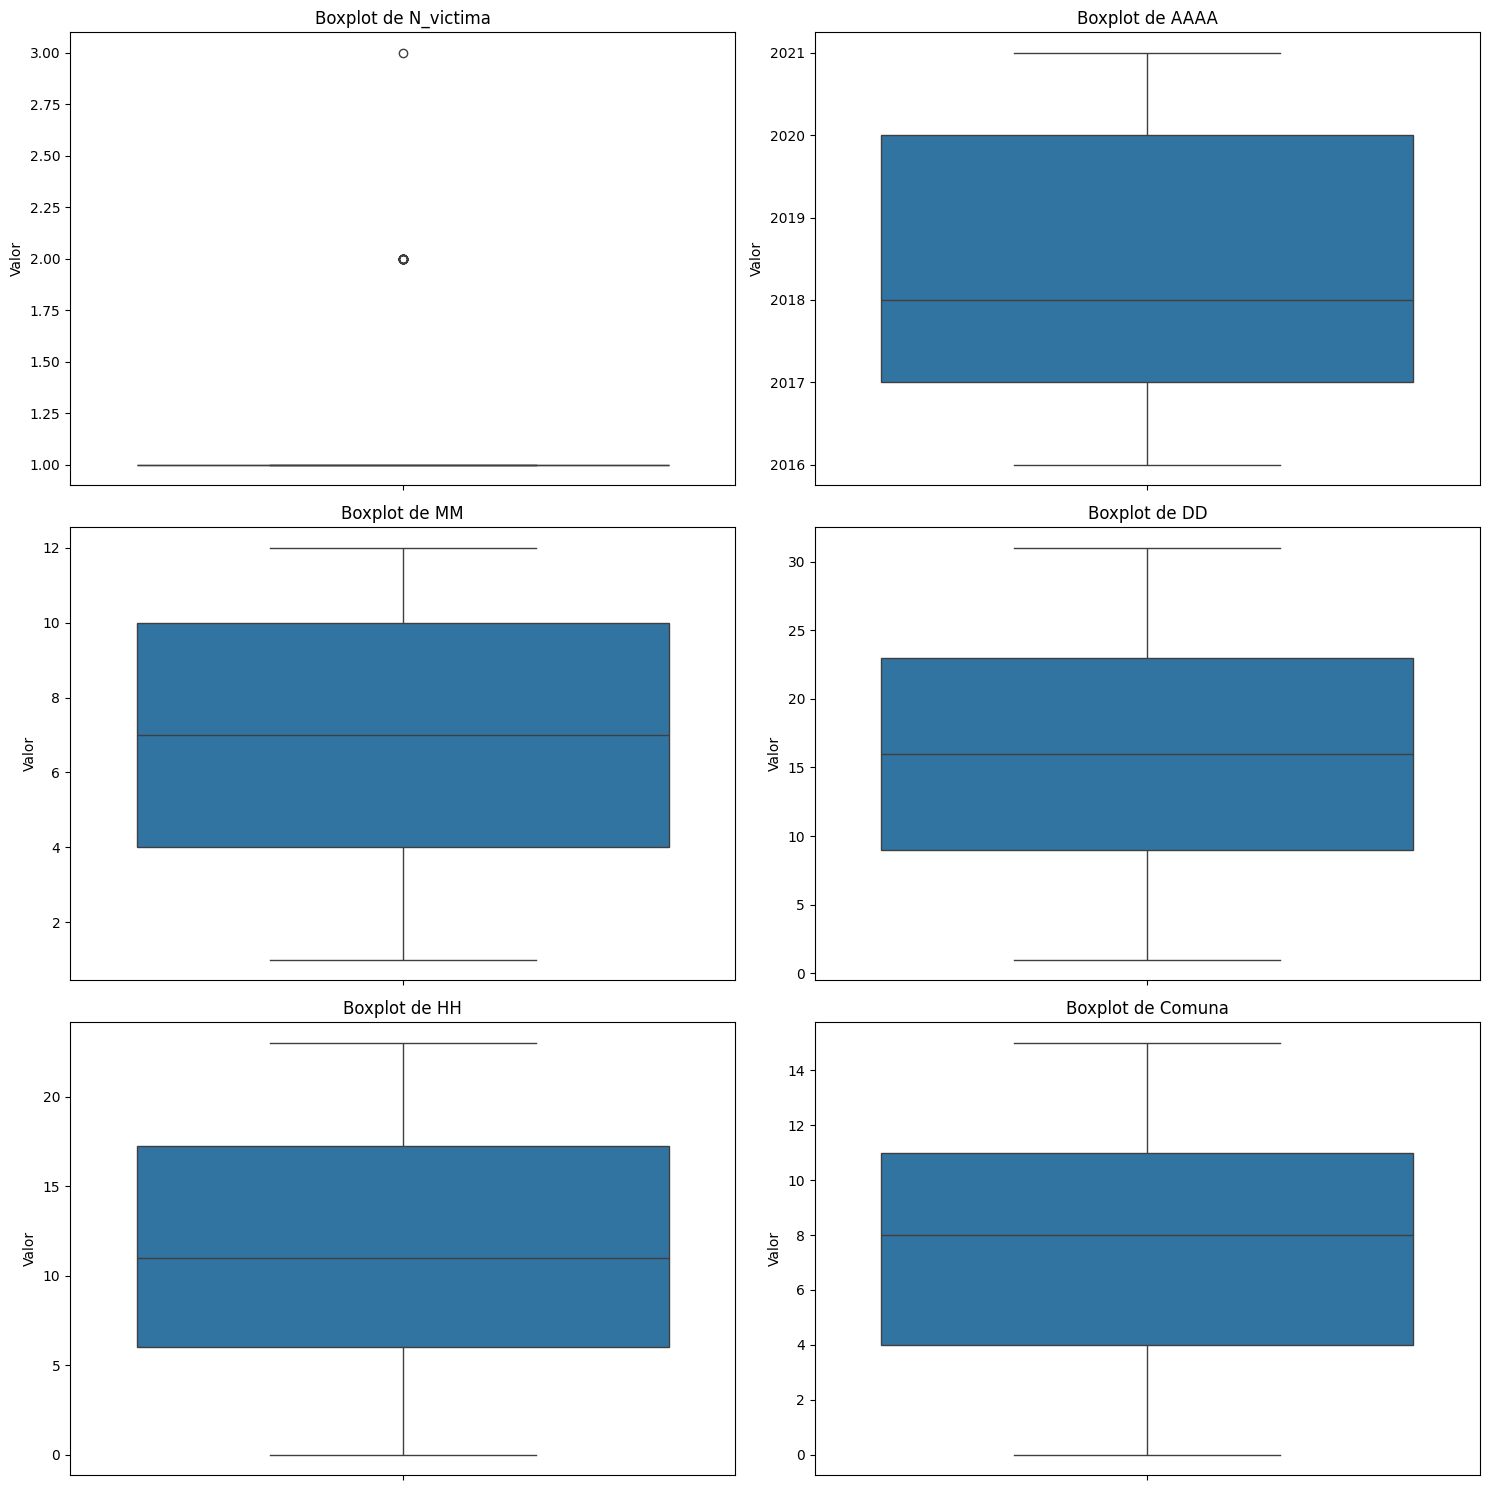

In [77]:
# Creamos un subplots para la 'columnas_numericas' 
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, columna in enumerate(columnas_numericas):
    sns.boxplot(data=df_hecho[columna], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot de {columna}')
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('Valor')

plt.tight_layout()
plt.show()

No se identifican valores atípicos evidentes en las columnas numéricas que sugieran la necesidad de intervenir.

In [78]:
df_hecho.isin(['SD']).sum().sort_values(ascending=False)

Acusado                  23
Victima                   9
Hora                      1
Lugar                     1
Cruce                     0
Participante              0
pos y                     0
pos x                     0
XY (CABA)                 0
Comuna                    0
Direccion_normalizada     0
ID_Accidente              0
Altura                    0
N_victima                 0
Tipo_de_calle             0
HH                        0
DD                        0
MM                        0
AAAA                      0
Fecha                     0
Calle                     0
dtype: int64

-------------------------------------------------------

# Análisis EDA para el archivo "VICTIMA"

#### Importar los datos

In [79]:
ruta_archivo = "DataSet/victima.csv"
df_vic = pd.read_csv(ruta_archivo)
df_vic.head(1)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016


## Tipo de datos del df

In [80]:
tipo_datos(df_vic)

,nombre_campo,tipo_datos
0,ID_hecho,[<class 'str'>]
1,FECHA,[<class 'str'>]
2,AAAA,[<class 'int'>]
3,MM,[<class 'int'>]
4,DD,[<class 'int'>]
5,ROL,[<class 'str'>]
6,VICTIMA,[<class 'str'>]
7,SEXO,[<class 'str'>]
8,EDAD,[<class 'str'>]
9,FECHA_FALLECIMIENTO,[<class 'str'>]


Se requiere realizar la modificaciones de algunos tipos de datos para su uso posteriormente

## Valores Faltantes

Partiendo de que nuestros DataSet 'Hechos' tiene 717 filas x 10 Columnas

Se observa el numero de valores en cada columna. Lo cual nos muestra que:

In [81]:
# Ordenamos los columnas pore los que mas presentan valores faltantes 
df_vic.isnull().sum().sort_values(ascending=False)

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

No se presentan ningun valor faltante pero como en nuestro anterior dataset podran existir valores con valores SD = Sin Dato. Se debe realizar la comprobacion

In [82]:
df_vic.isin(['SD']).sum().sort_values(ascending=False)

FECHA_FALLECIMIENTO    68
EDAD                   53
ROL                    11
VICTIMA                 9
SEXO                    6
ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
dtype: int64

Se observa que las columnas ['FECHA_FALLECIMIENTO', 'EDAD', 'ROL'] son las que presentan valores SD. <br>
- Ya que la 'FECHA_FALLECIMIENTO' no la consideramos relevante para el caso de estudio no se realizara ningun tipo de imputacion sobre los faltantes.
- Ya que el 'ROL' Y 'EDAD' son variables que si se imputan sin un estudio mas profundo podrian llegar a afectar los resultados de un primero estudio no se realizará ningun tipo de imputacion sobre los faltantes por el momento




## Valores Duplicados

Primero observo los valores unicos por columna para luego poder compararlos con los valores duplicados 

In [83]:
df_vic.nunique().sort_values(ascending=False)

ID_hecho               696
FECHA                  598
FECHA_FALLECIMIENTO    563
EDAD                    86
DD                      31
MM                      12
VICTIMA                  8
AAAA                     6
ROL                      5
SEXO                     3
dtype: int64

Crear una funcion para observar los duplicados por columnas 

In [84]:
duplicados_por_columna = {}

# Iteramos sobre cada columna del DataFrame
for columna in df_vic.columns:
    duplicados_por_valor = df_vic[columna].duplicated().sum()
    duplicados_por_columna[columna] = duplicados_por_valor

ordenados = dict(sorted(duplicados_por_columna.items(), key=lambda x: x[1]))

for columna, recuento in ordenados.items():
    print(f"Columna '{columna}': {recuento} valores duplicados.")

Columna 'ID_hecho': 21 valores duplicados.
Columna 'FECHA': 119 valores duplicados.
Columna 'FECHA_FALLECIMIENTO': 154 valores duplicados.
Columna 'EDAD': 631 valores duplicados.
Columna 'DD': 686 valores duplicados.
Columna 'MM': 705 valores duplicados.
Columna 'VICTIMA': 709 valores duplicados.
Columna 'AAAA': 711 valores duplicados.
Columna 'ROL': 712 valores duplicados.
Columna 'SEXO': 714 valores duplicados.


Se observa que una de las primeras cuestiones que salta a la vista es que la columna 'ID_hecho' contenga valores duplicados

In [85]:
df_vic[df_vic.duplicated(subset=['ID_hecho'], keep=False)].head(11)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
29,2016-0041,3/29/2016,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54,3/29/2016
30,2016-0041,3/29/2016,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,3/30/2016
98,2016-0126,9/18/2016,2016,9,18,CONDUCTOR,AUTO,MASCULINO,37,SD
99,2016-0126,9/18/2016,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,SD
163,2017-0026,2/26/2017,2017,2,26,PASAJERO_ACOMPAÑANTE,AUTO,FEMENINO,23,2/26/2017
164,2017-0026,2/26/2017,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19,2/26/2017
173,2017-0035,3/23/2017,2017,3,23,CONDUCTOR,AUTO,MASCULINO,28,3/23/2017
174,2017-0035,3/23/2017,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,3/23/2017
175,2017-0035,3/23/2017,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,3/23/2017
176,2017-0036,3/29/2017,2017,3,29,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,SD,3/29/2017


Al indagar en el DataSet se observa que estos 'ID_hecho' estan repetidos ya que en caso de que  el accidente deajra mas de un victima se registraba cada victima por separa. Por lo cual no hay problema. Se debe unicamente tener esto presente para un futuro cuando se decida realizar un merge con el DataSet 'Hecho' y esto explica porque: <br>

Las 717 (filas de Victima) - 696 (Filas de Hecho) = 21 Filas repetidas

El resto de las columna no nos interesa si tiene o no valores repetidos ya por sus caracteristicas es normal que lo tenga. Por ejemplo 'EDAD','ROL' , entre otras

## Outliers

In [86]:
tipos_de_datos = df_vic.dtypes
variables_numericas = tipos_de_datos[tipos_de_datos != 'object'].index.tolist()
variables_categoricas = tipos_de_datos[tipos_de_datos == 'object'].index.tolist()
print("Variables numéricas:")
print(variables_numericas)
print("\nVariables categóricas:")
print(variables_categoricas)

Variables numéricas:
['AAAA', 'MM', 'DD']

Variables categóricas:
['ID_hecho', 'FECHA', 'ROL', 'VICTIMA', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO']


In [87]:
columnas_numericas = ['AAAA', 'MM', 'DD']

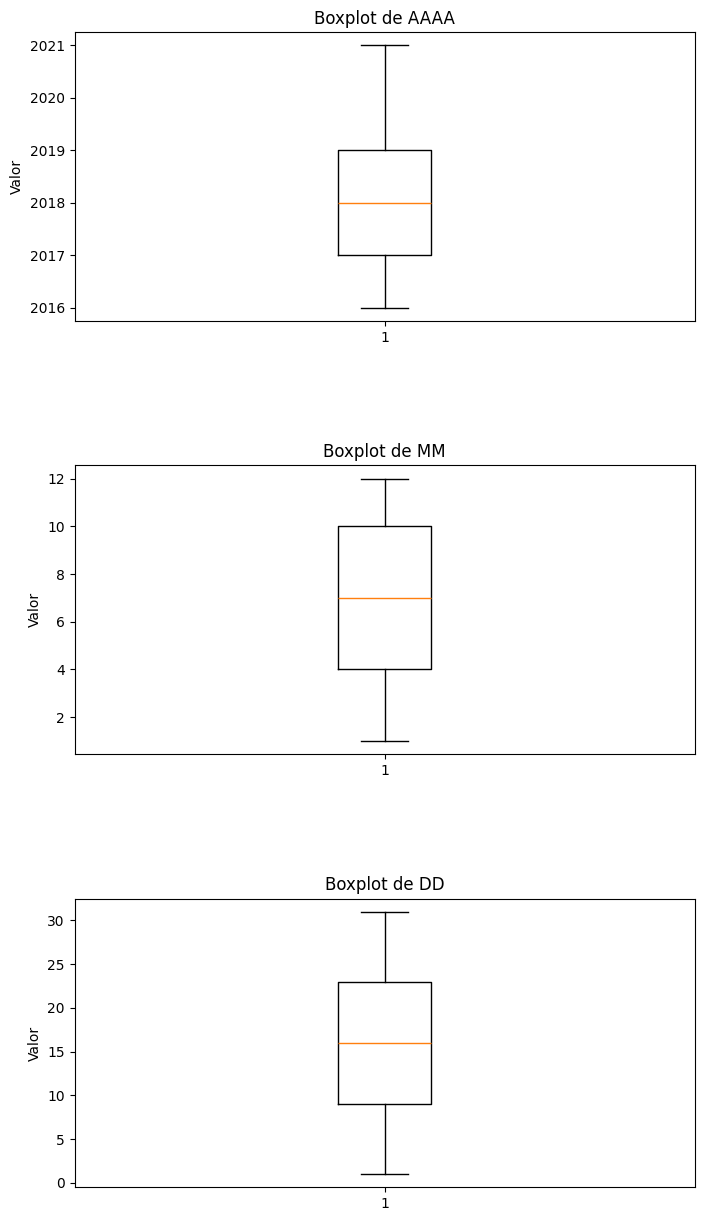

In [88]:
fig, axs = plt.subplots(nrows=len(columnas_numericas), ncols=1, figsize=(8, 15))

# Iterar sobre las columnas numéricas 
for i, col in enumerate(columnas_numericas):
    axs[i].boxplot(df_vic[col])
    axs[i].set_title(f'Boxplot de {col}')
    axs[i].set_ylabel('Valor')


plt.subplots_adjust(hspace=0.5)
plt.show()

No se identifican valores atípicos evidentes en las columnas numéricas que sugieran la necesidad de intervenir.

Se trabaja de manera independiente la columna 'EDAD' ya que es tiene valores de tipo SD= Sin Dato

In [89]:
# Imprimo los valores unicos de edad para observar si existen Outliers
edades = df_vic['EDAD'].unique()
edades_ = sorted(edades)
np.array(edades_)

array(['1', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51',
       '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62',
       '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83',
       '84', '85', '86', '87', '88', '91', '92', '95', 'SD'], dtype='<U2')

No se identifica ningun tipo de valor Atipico dentro la columna 'EDAD'

-------------------------------------------------------------

Una vez termiando el analisis de los Faltantes, Valores Duplicados y Outliers de ambos DataSets se procede a hacer el analisis del caso en estudio.

Realizaremos un analisis para buscar correlaciones entre las columnas con el fin de identificar tendencias o patrones para nuestro modelo 

### Análisis por Número de Victimas 

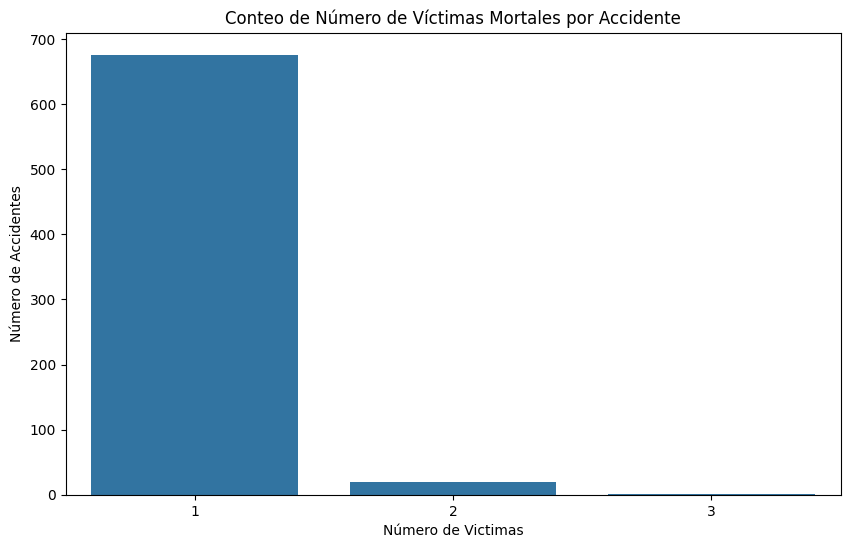

In [90]:
victimas = df_hecho['N_victima'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=victimas.index, y=victimas.values)
plt.title('Conteo de Número de Víctimas Mortales por Accidente')
plt.xlabel('Número de Victimas')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=0)

plt.show()

En la mayoria de accidentes el número de victimas fatales suele ser de 1 persona

### Análisis del Número de Victimas por valores de Tiempo

Crearemmos un grafico para ver el numero de victimas por año para ver su relacion 

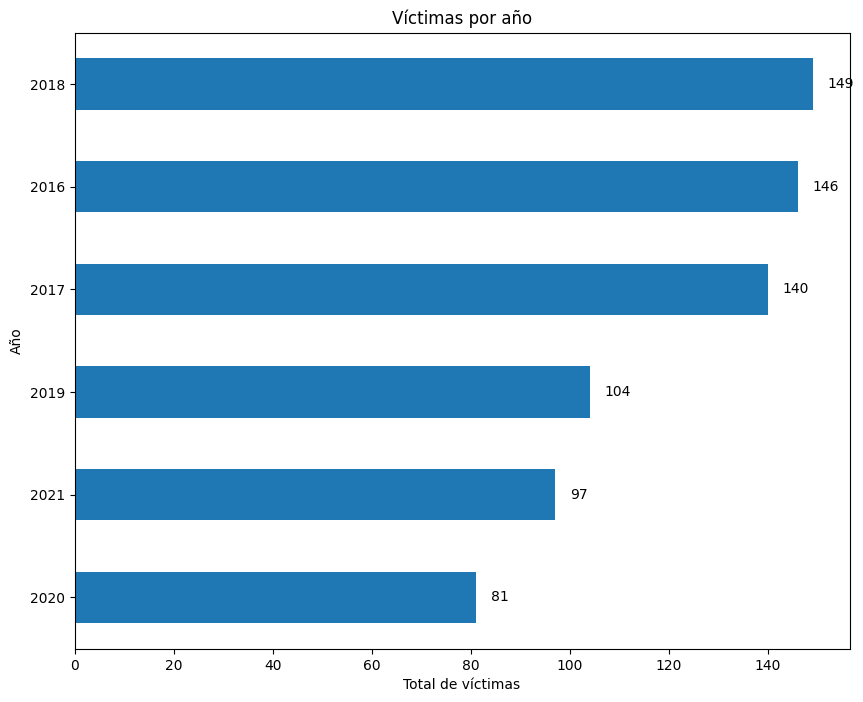

In [91]:
victimas_año = df_hecho.groupby('AAAA')['N_victima'].sum()

# Ordenar los años de mayor a menor en cuanto al total de N_VICTIMAS
victimas_año = victimas_año.sort_values(ascending=True)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 8))
ax = victimas_año.plot(kind='barh')

# Agregar el total en las etiquetas
for i, v in enumerate(victimas_año):
    ax.text(v + 3, i, str(v), color='black', va='center')

plt.title('Víctimas por año')
plt.xlabel('Total de víctimas')
plt.ylabel('Año')

# Mostrar el gráfico
plt.show()

Observamos que hubo un menor número de victimas en el año 2020. Esperado, debido a las medidas como: La cuarentena, Restricción a la movilidad y medidas de Aislamiento tomadas por el país  tras la pandemia de COVID-19

Crearemos un diagrama de BoxPlot que nos muestra cómo varía la suma de víctimas a lo largo de los años, con una descomposición adicional por mes, lo que permite observar patrones y posibles anomalías en la distribución de las víctimas.

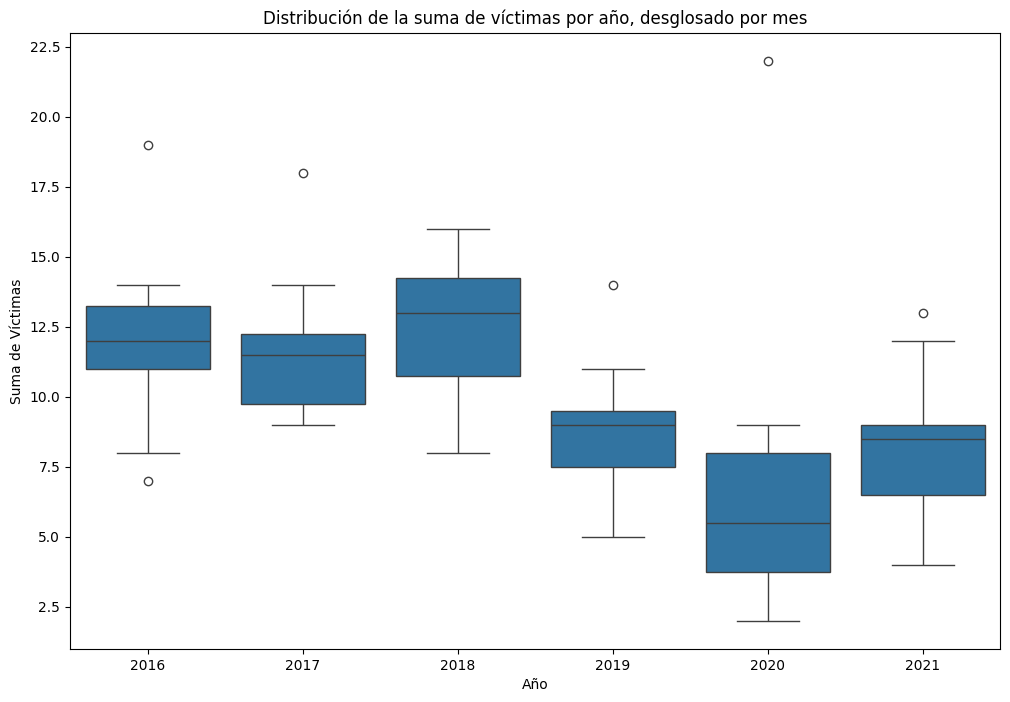

In [92]:
suma_victimas = df_hecho.groupby(['AAAA', 'MM'])['N_victima'].sum().reset_index()

plt.figure(figsize=(12, 8))

sns.boxplot(x='AAAA', y='N_victima', data=suma_victimas)
for año, datos in suma_victimas.groupby('AAAA'):
    Q1 = datos['N_victima'].quantile(0.25)
    Q3 = datos['N_victima'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = datos[(datos['N_victima'] < Q1 - 1.5 * IQR) | (datos['N_victima'] > Q3 + 1.5 * IQR)]
    for i, fila in outliers.iterrows():
        plt.annotate(f"{fila['N_victima']}", xy=(fila['AAAA'], fila['N_victima']), xytext=(-15, 10), textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))


plt.title('Distribución de la suma de víctimas por año, desglosado por mes')
plt.xlabel('Año')
plt.ylabel('Suma de Víctimas')

# Mostrar el gráfico
plt.show()

Como habiamos supuesto el año 2020 presenta los cuartiles con menores homicidos. Pero a su vez  tiene outliers más altos en algunos meses

Crearemos un diagrama que nos permita ver mas detalladamente el cantidad de victimas mensuales por año usando barras  y poder determinar si existe un tipo de correlacion temporal entre los datos

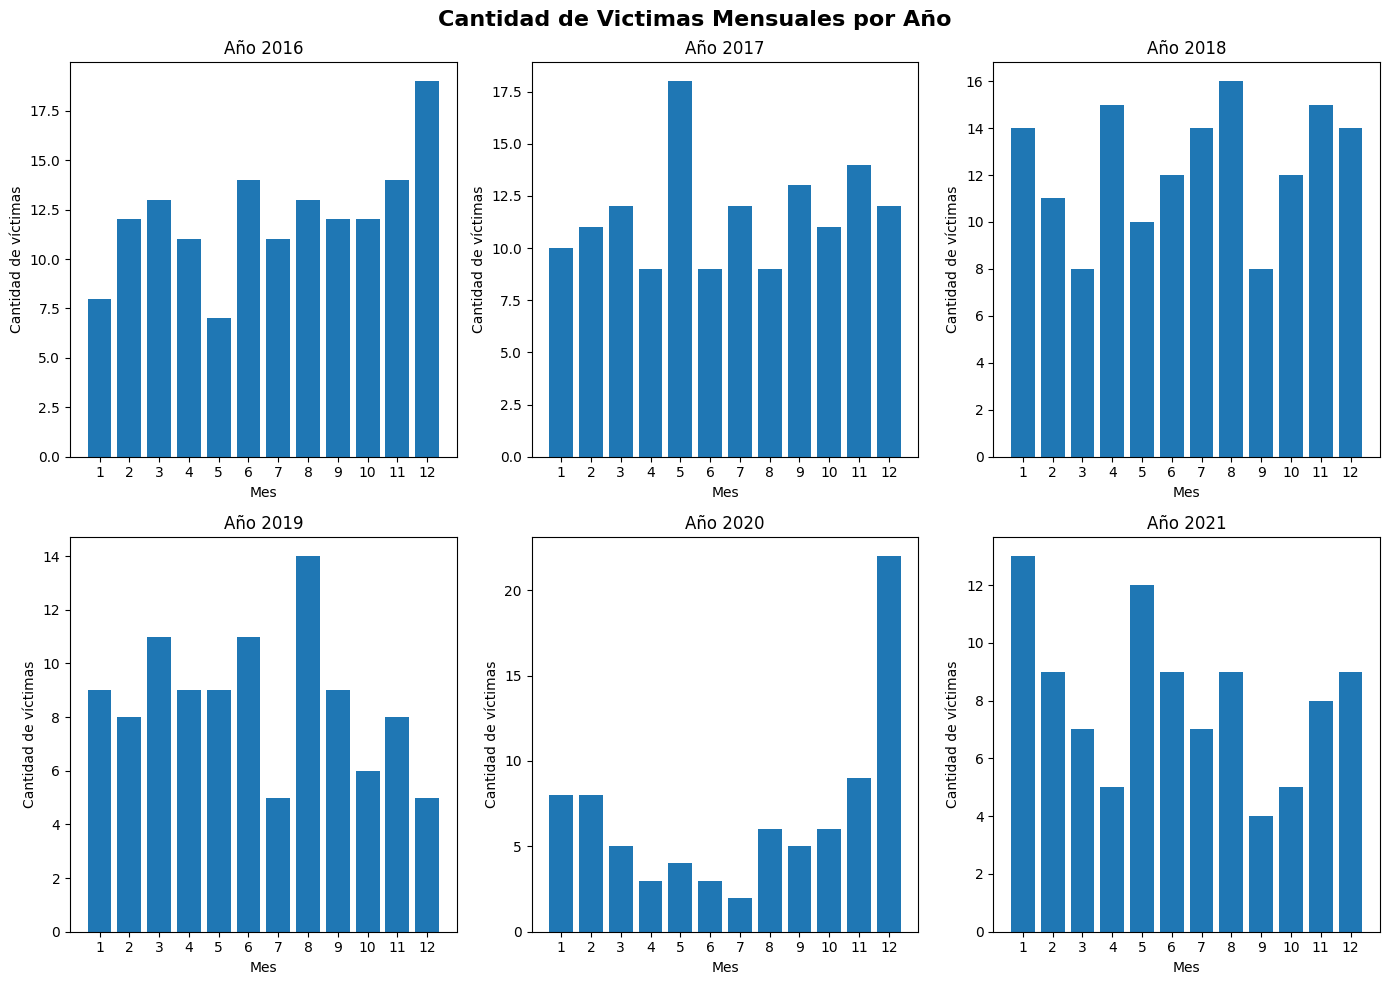

In [93]:
datos_año = df_hecho.groupby('AAAA')

plt.figure(figsize=(14, 10))

for i, (año, datos_año) in enumerate(datos_año):
    plt.subplot(2, 3, i+1)
    datos_por_mes = datos_año.groupby('MM')['N_victima'].sum()
    plt.bar(datos_por_mes.index, datos_por_mes.values)
    plt.title(f'Año {año}') 
    plt.xlabel('Mes')
    plt.ylabel('Cantidad de víctimas')
    plt.xticks(np.arange(1, 13)) 

plt.suptitle('Cantidad de Victimas Mensuales por Año', fontsize=16, fontweight='bold', ha='center')
plt.tight_layout()
plt.show()

 Aunque no se observa una tendencia clara en la cantidad de víctimas mensuales por año, la presencia de factores estacionales y eventos externos, como la pandemia de COVID-19, destaca la importancia de considerar múltiples variables al analizar la seguridad vial y desarrollar estrategias efectivas de prevención de accidentes. <br>
 Ante la falta de una tendencia clara, sería beneficioso realizar un análisis más detallado que tenga en cuenta una variedad de factores, como cambios en la infraestructura vial, implementación de políticas de seguridad vial, cambios en el comportamiento del conductor, entre otros, para comprender mejor las fluctuaciones en la cantidad de víctimas de accidentes a lo largo del tiempo.

### Análisis por Comunas

Realizamos un grafico de las comunas con mas casos de accidentalidad por año

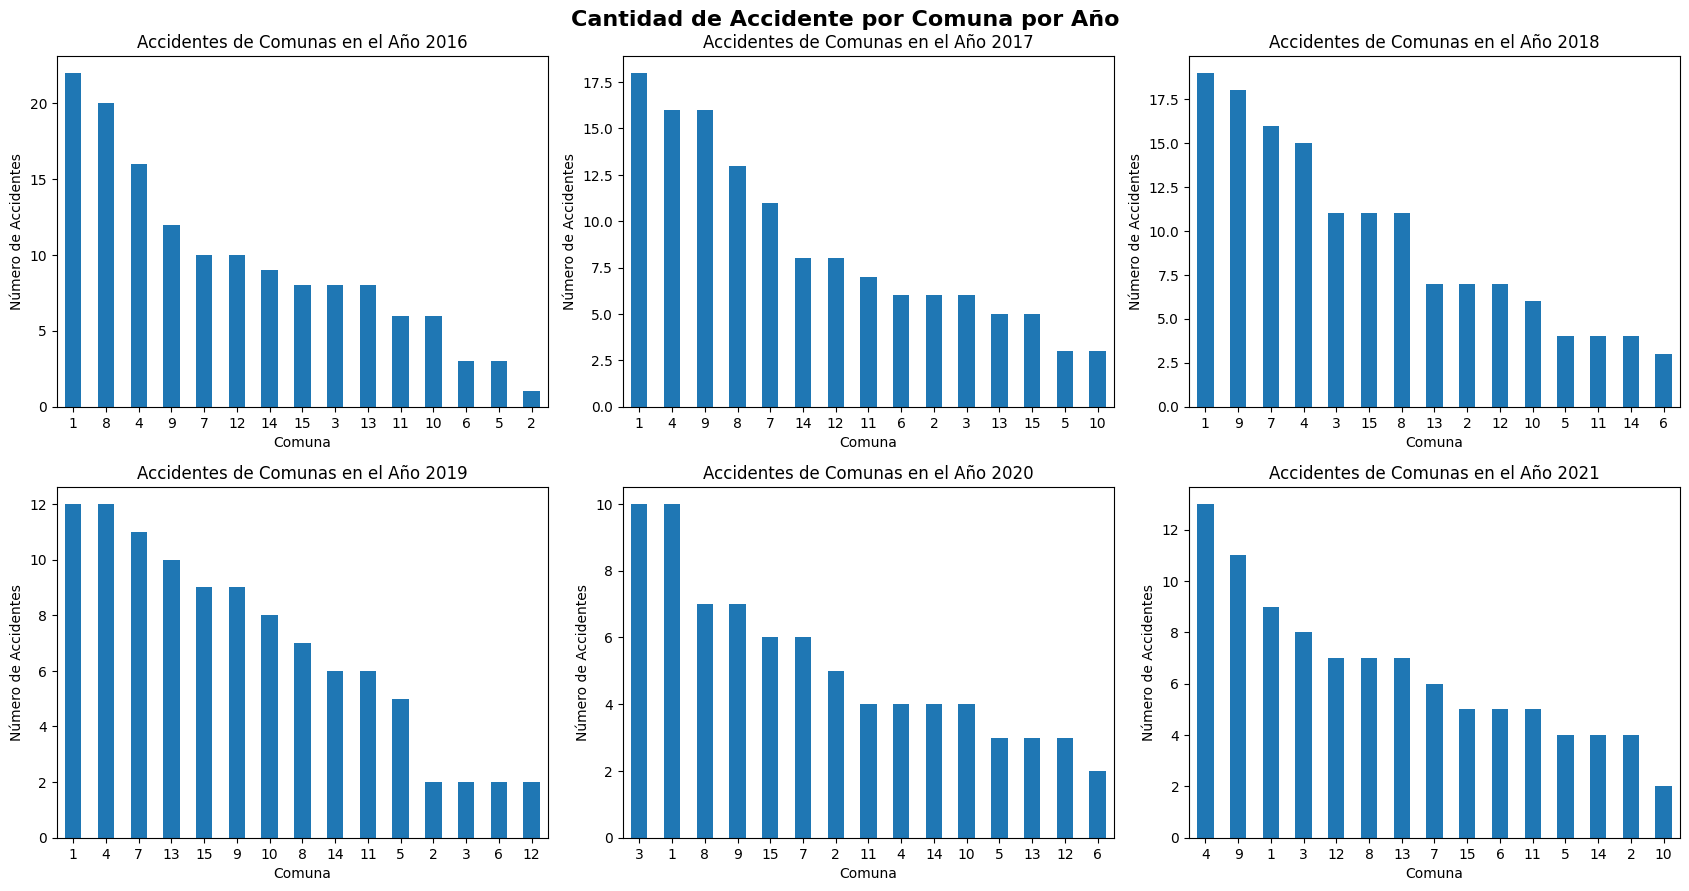

In [94]:

df_hecho_f = df_hecho[df_hecho['Comuna'] != 0]

años_unicos = df_hecho_f['AAAA'].unique()
plt.figure(figsize=(17, 13))


for i, año in enumerate(años_unicos, start=1):
    # Filtrar los datos para el año actual
    datos_por_año = df_hecho_f[df_hecho_f['AAAA'] == año]
    recuento_por_comuna = datos_por_año['Comuna'].value_counts()
    plt.subplot(3, 3, i)
    recuento_por_comuna.plot(kind='bar')
    plt.title(f'Accidentes de Comunas en el Año {año}')
    plt.xlabel('Comuna')
    plt.ylabel('Número de Accidentes')
    plt.xticks(rotation=0)

plt.suptitle('Cantidad de Accidente por Comuna por Año', fontsize=16, fontweight='bold', ha='center')    
plt.tight_layout()
plt.show()

 Al observar el número de accidentes anuales por comuna en Buenos Aires desde 2016 hasta 2021, se destacan ciertas tendencias en cuanto a las comunas con mayor incidencia de accidentes. Si se decidiera a elegir las columnas que más veces aparecen en un top 4 de las comunas con mayor tasa de accidentalidad por año obtendriamos: 

- La Comuna 1 se encuentra consistentemente en el primer lugar, apareciendo en el top 5 durante los seis años analizados. Esto sugiere una alta incidencia de accidentes en esta área a lo largo del tiempo.
- La Comuna 9 y 4 también muestra una presencia significativa, apareciendo en el top 5 durante cinco años. Esto indica una tendencia persistente hacia un alto número de accidentes en esta comuna.
- La Comuna 8 y 3 aparece en el top 5 durante tres años, lo que sugiere que también experimenta una cantidad significativa de accidentes, aunque con una presencia ligeramente menos consistente en comparación con las comunas anteriores.


### Análisis por Tipo de Acusado

In [95]:
df_hecho['Fecha'] = pd.to_datetime(df_hecho['Fecha'])

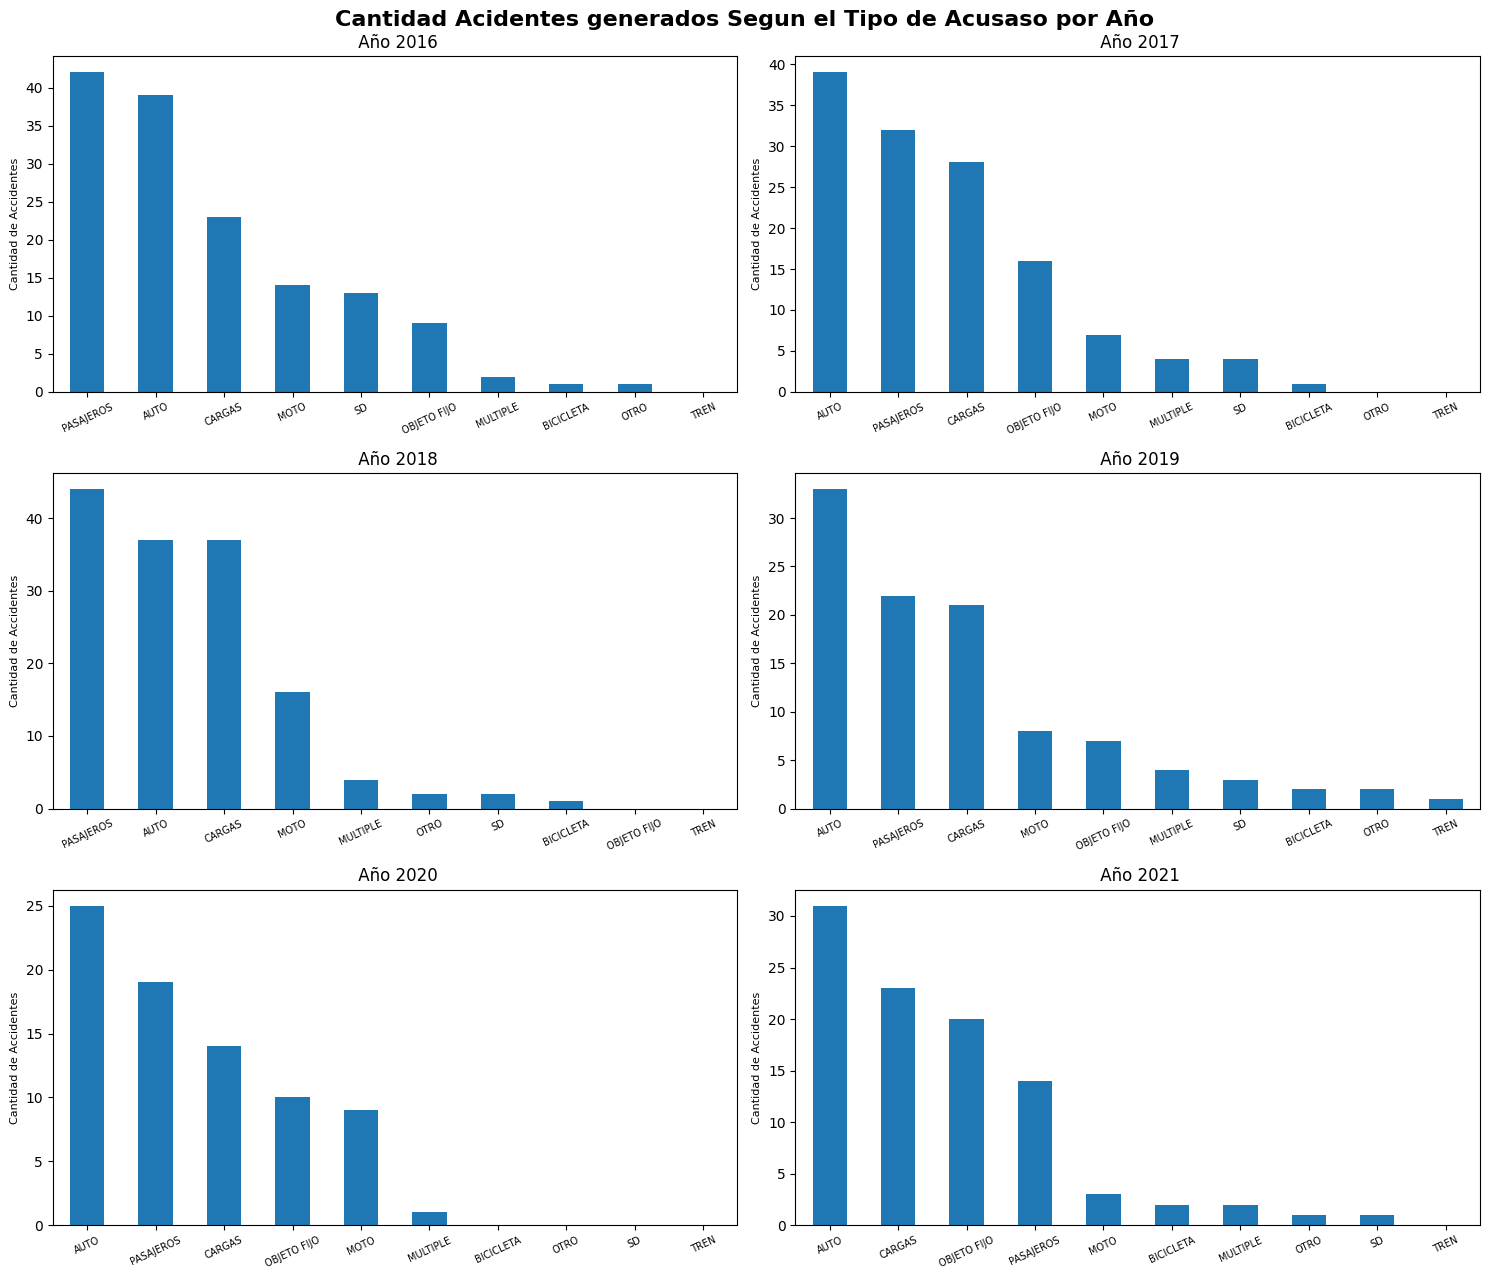

In [96]:
acusados_por_año = df_hecho.groupby(['Acusado', 'AAAA']).size().unstack(fill_value=0)

cantidad_años = len(df_hecho['AAAA'].unique())
fig, axs = plt.subplots(3, 2, figsize=(15, 13))

for i, año in enumerate(df_hecho['AAAA'].unique()):
    fila = i // 2  
    columna = i % 2  
    acusados_por_año[año].sort_values(ascending=False).plot(kind='bar', ax=axs[fila, columna])
    axs[fila, columna].set_title(f' Año {año}')
    axs[fila, columna].set_xlabel('')
    axs[fila, columna].set_ylabel('Cantidad de Accidentes', fontsize=8)
    axs[fila, columna].tick_params(axis='x', labelrotation=25, labelsize=7)
    axs[fila, columna].legend().set_visible(False)

plt.suptitle('Cantidad Acidentes generados Segun el Tipo de Acusaso por Año', fontsize=16, fontweight='bold', ha='center') 
plt.tight_layout()
plt.show()

Se muestra una consistencia en la predominancia de Autos y Pasajeros como los principales tipos de acusados en Accidentes de tráfico. Con vehículos de Carga siguiéndoles de cerca. Sin embargo, la inclusión de un objeto fijo en el top en 2021 señala la importancia de considerar las fluctuaciones y cambios en los patrones de accidentes de tráfico a lo largo del tiempo para desarrollar estrategias efectivas de prevención y seguridad vial.

- Autos y Pasajeros lideran consistentemente: Los tipos de acusados más comunes son los autos y los pasajeros, los cuales ocupan las dos primeras posiciones en el ranking y están constantemente disputándose el primer puesto. Esto sugiere que los vehículos motorizados, tanto los conductores como los pasajeros, son los más frecuentemente involucrados en accidentes de tráfico a lo largo del tiempo.
- Cargas también ocupan un lugar destacado: La presencia de vehículos de carga en el top indica su relevancia en los accidentes de tráfico. Esto puede atribuirse a su tamaño y peso, que pueden influir en la gravedad de los accidentes en los que están involucrados.
- Objeto Fijo en 2021: Es interesante destacar que, en el año 2021, un objeto fijo obtuvo la tercera posición en el ranking, por encima de los pasajeros. Esto sugiere un cambio inusual en la dinámica de los accidentes de tráfico durante ese año, donde los objetos fijos jugaron un papel más prominente como acusados en comparación con años anteriores.


### Análisis del Tipo de Victimas 

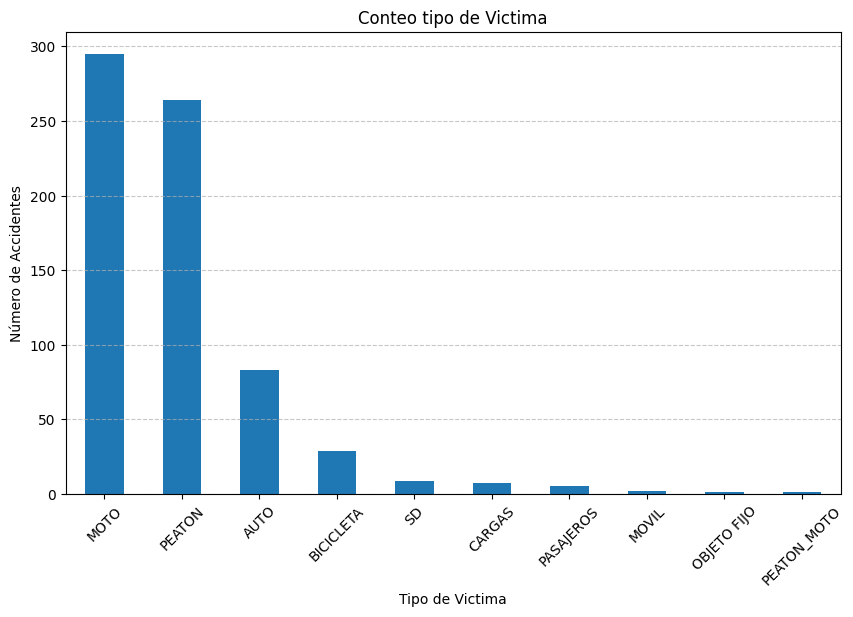

In [97]:
conteo_victima = df_hecho['Victima'].value_counts()

plt.figure(figsize=(10, 6))
conteo_victima.plot(kind='bar') 
plt.title('Conteo tipo de Victima')
plt.xlabel('Tipo de Victima')
plt.ylabel('Número de Accidentes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.show()

El hecho de que las motocicletas sean más propensas a sufrir más accidentes mortales que incluso los mismos peatones y otras formas de transporte resalta la importancia de medidas de seguridad adicionales para los motociclistas, así como una mayor conciencia y cumplimiento de las normas de tráfico por parte de todos los usuarios de la vía pública.

Se puede determinan que la mayor cantidad de victimas involucradas en accidentes de transito son:
-  En primer lugar los Motociclistas
-  En segundo lugar los Peatones

Otro factor a considerar es el uso adecuado del equipo de protección. Mientras que los ocupantes de automóviles suelen estar protegidos por sistemas de retención y estructuras de vehículos diseñadas para absorber energía en caso de colisión, los motociclistas dependen en gran medida de su equipo de protección personal, como cascos, chaquetas con protección y guantes.

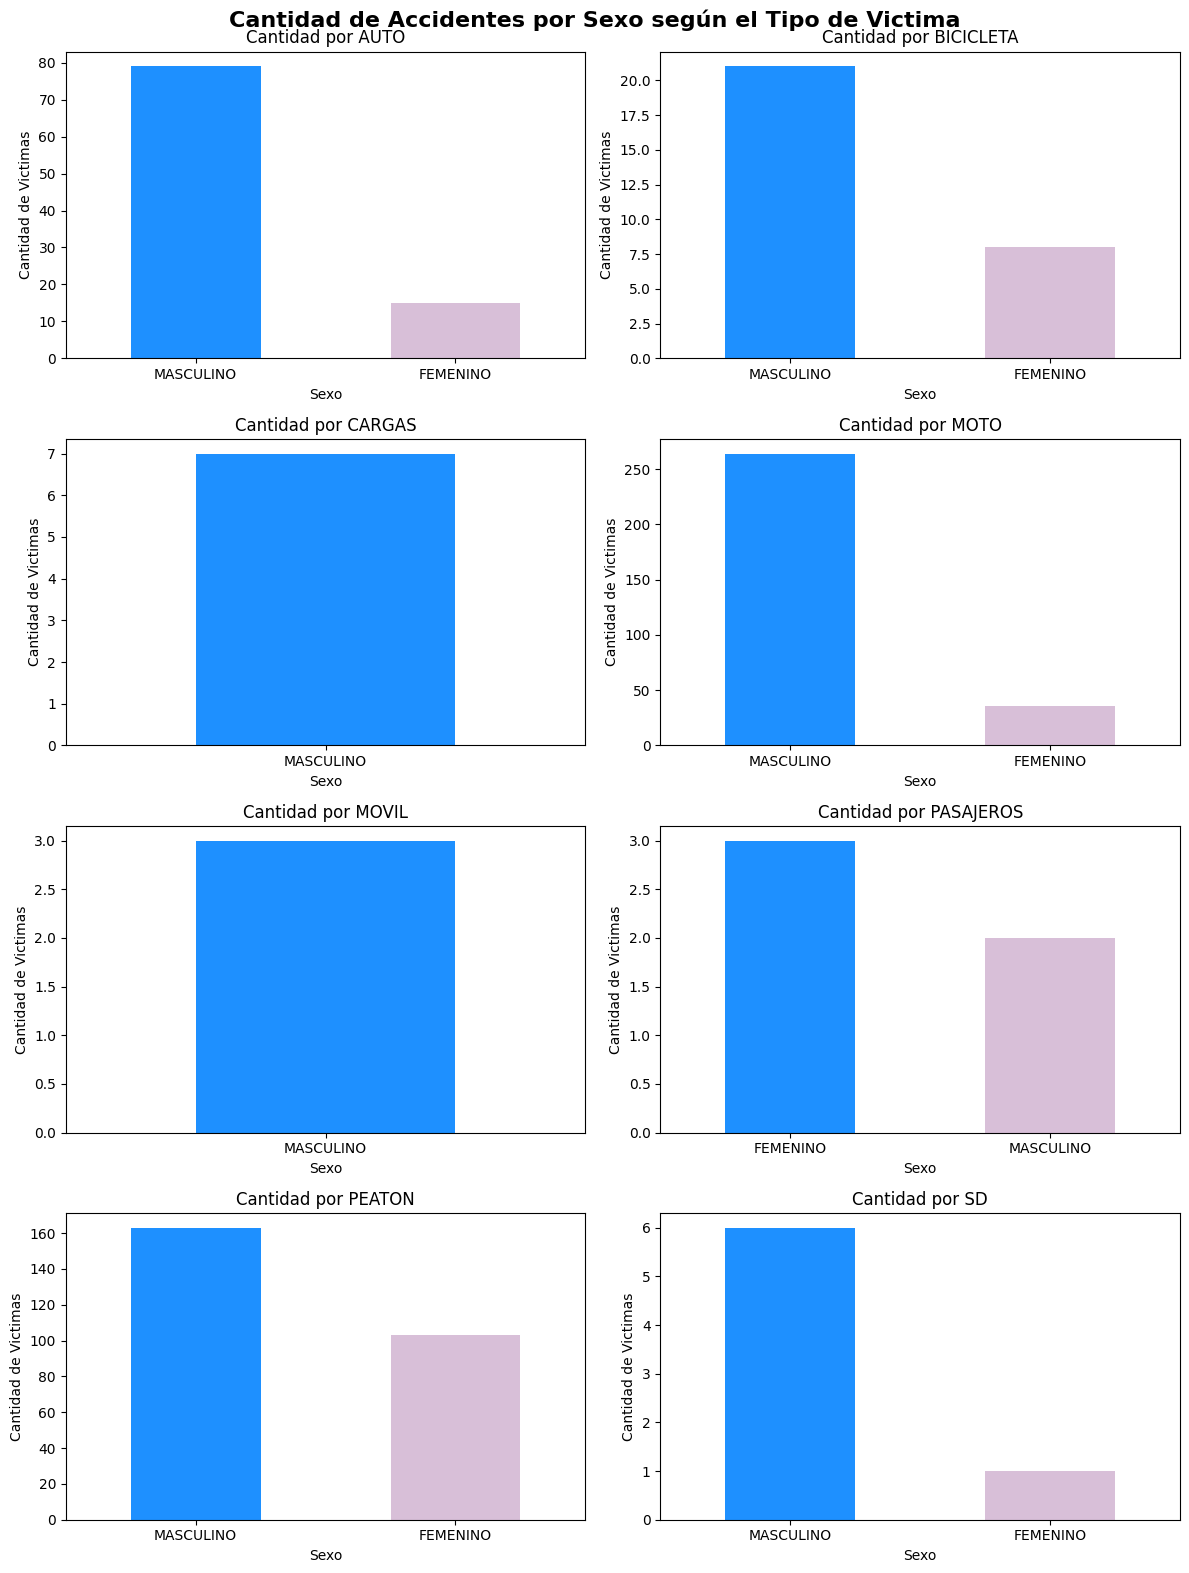

In [98]:
df_vic_filtrado = df_vic[df_vic['SEXO'] != 'SD']

grupo_por_victima = df_vic_filtrado.groupby('VICTIMA')

# Crear una matriz de subgráficos de 4x2
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Iterar sobre las posiciones de la matriz de subgráficos y llenarlas con los gráficos
for i, (VICTIMA, grupo) in enumerate(grupo_por_victima):
    fila = i // 2
    columna = i % 2
    
    # Contar el sexo para esta víctima
    conteo_sexo = grupo['SEXO'].value_counts()
    
    # Crear un gráfico de barras para este tipo de víctima en la posición (fila, columna)
    conteo_sexo.plot(kind='bar', color=['dodgerblue', 'thistle'], ax=axes[fila, columna])
    axes[fila, columna].set_title('Cantidad por {}'.format(VICTIMA))
    axes[fila, columna].set_xlabel('Sexo')
    axes[fila, columna].set_ylabel('Cantidad de Victimas')
    axes[fila, columna].tick_params(axis='x', rotation=0)  # Para evitar la rotación de etiquetas en el eje x

plt.suptitle('Cantidad de Accidentes por Sexo según el Tipo de Victima', fontsize=16, fontweight='bold', ha='center') 
plt.tight_layout()
plt.show()

Resulta notable que, independientemente del tipo de Víctima en un accidente (ya sea Bicicleta, Auto, Carga, Moto, Móvil, Peatón). Los hombres representan consistentemente la mayor cantidad de víctimas en comparación con las mujeres. Esto sugiere que los hombres pueden estar más expuestos o son más propensos a sufrir accidentes en diversas situaciones de tráfico. Sin embargo, es destacable que el tipo de víctima en el que más mujeres se presentan es en la categoría de Peatón. <br>
Aunque el número de mujeres en estos casos puede ser significativo, aún no supera las cifras de hombres.  Esto podría indicar diferentes patrones de movilidad, exposición al riesgo o comportamientos de conducción entre hombres y mujeres, lo que podría requerir un análisis más detallado para comprender completamente las razones detrás de estas disparidades en los accidentes de tráfico.

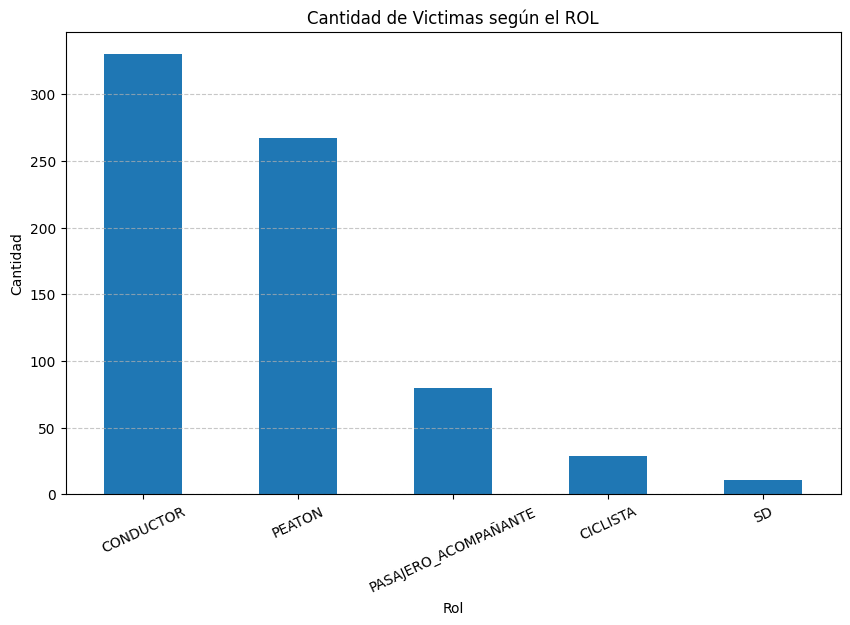

In [99]:
conteo_rol = df_vic['ROL'].value_counts()

plt.figure(figsize=(10, 6))
conteo_rol.plot(kind='bar')
plt.title('Cantidad de Victimas según el ROL')
plt.xlabel('Rol')
plt.ylabel('Cantidad')
plt.xticks(rotation=25)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()

El análisis de los datos confirma una tendencia previsible basada en observaciones anteriores. La mayor cantidad de víctimas en accidentes de tráfico se encuentran en el rol de conductor, seguido por peatones.

- Conductores como víctimas principales: Los conductores de vehículos son los más afectados en accidentes de tráfico. Esto puede atribuirse al hecho de que están directamente involucrados en la operación de vehículos y están expuestos a diversos riesgos en la carretera, incluidas colisiones con otros vehículos, objetos fijos u obstáculos en la vía.
- Importancia de la seguridad del conductor: Dado que los conductores son la categoría de víctimas más común, resalta la importancia de medidas de seguridad dirigidas a los conductores, como el uso de cinturones de seguridad, sistemas de frenado avanzados, educación vial y concienciación sobre los peligros de la conducción distraída o bajo los efectos del alcohol y las drogas.
- Peatones como segunda categoría de víctimas: La alta incidencia de peatones como víctimas subraya la vulnerabilidad de los usuarios vulnerables de la carretera. Los peatones pueden estar expuestos a riesgos significativos al cruzar calles o al transitar por áreas con tráfico intenso. Esto resalta la necesidad de mejorar la seguridad peatonal mediante medidas como la construcción de pasos de peatones seguros, la reducción de velocidades de vehículos en áreas urbanas y la concienciación sobre la importancia de la visibilidad y el respeto mutuo entre conductores y peatones.

### Analisis Rango Etario

Para agrupar edades en un estudio de accidentes automovilísticos, es importante considerar los riesgos asociados con cada grupo de edad y la frecuencia relativa de accidentes en esas cohortes. Una propuesta de agrupación posible podría ser la siguinte:

- 1-15 años: Este grupo incluye a los niños y adolescentes. A menudo son pasajeros en vehículos y pueden ser víctimas de accidentes debido a la falta de experiencia y conocimiento sobre seguridad vial. También puede haber casos de conductores jóvenes.
- 16-24 años: Este grupo es conocido por tener tasas de accidentes más altas debido a la inexperiencia, comportamientos de riesgo y a menudo el exceso de confianza al volante.
- 25-44 años: Esta es la edad donde la mayoría de las personas están en plena actividad laboral y social, lo que podría significar más tiempo en la carretera y, por ende, más exposición al riesgo de accidentes. Además, la distracción debido a responsabilidades familiares y laborales puede ser un factor.
- 45-64 años: En esta etapa de la vida, muchas personas tienen más experiencia al volante y pueden ser más conscientes de la seguridad vial. Sin embargo, podría haber factores como la fatiga, el estrés y los problemas de salud que podrían contribuir a los accidentes.
- 65-74 años: A medida que las personas envejecen, pueden experimentar cambios en la visión, la movilidad y los tiempos de reacción, lo que podría afectar su capacidad para conducir de manera segura.
- 75-94 años: Este grupo abarca a las personas mayores, que pueden enfrentar desafíos de salud significativos que afectan su capacidad para conducir de manera segura. La disminución de la agudeza mental, la visión y los reflejos son preocupaciones comunes en este grupo de edad.

In [100]:
# Creación de los Rangos
df_vic_filtrado = df_vic[df_vic['EDAD'] != 'SD']
df_vic_filtrado['EDAD'] = pd.to_numeric(df_vic_filtrado['EDAD'])

# Agrupación de edades
bins = [0, 15, 24, 44, 64, 74, 95]
labels = ['1-15', '16-24', '25-44', '45-64', '65-74', '75-95']
df_vic_filtrado['RANGO_ETARIO'] = pd.cut(df_vic_filtrado['EDAD'], bins=bins, labels=labels, right=False)
df_vic_filtrado.sample(10)

C:\Users\Jorge\AppData\Local\Temp\ipykernel_24164\1425869262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vic_filtrado['EDAD'] = pd.to_numeric(df_vic_filtrado['EDAD'])
C:\Users\Jorge\AppData\Local\Temp\ipykernel_24164\1425869262.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vic_filtrado['RANGO_ETARIO'] = pd.cut(df_vic_filtrado['EDAD'], bins=bins, labels=labels, right=False)


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,RANGO_ETARIO
497,2019-0062,8/1/2019,2019,8,1,PEATON,PEATON,FEMENINO,60,8/2/2019,45-64
236,2017-0107,9/1/2017,2017,9,1,CONDUCTOR,MOTO,MASCULINO,41,9/1/2017,25-44
542,2020-0004,1/14/2020,2020,1,14,PEATON,PEATON,MASCULINO,82,1/15/2020,75-95
435,2019-0001,1/8/2019,2019,1,8,CONDUCTOR,MOTO,MASCULINO,25,1/8/2019,25-44
12,2016-0017,2/15/2016,2016,2,15,PEATON,PEATON,MASCULINO,59,2/16/2016,45-64
643,2021-0024,3/3/2021,2021,3,3,CICLISTA,BICICLETA,MASCULINO,5,3/3/2021,1-15
204,2017-0069,5/29/2017,2017,5,29,CONDUCTOR,MOTO,MASCULINO,39,5/29/2017,25-44
273,2017-0149,11/30/2017,2017,11,30,PEATON,PEATON,MASCULINO,13,11/30/2017,1-15
687,2021-0068,8/15/2021,2021,8,15,CONDUCTOR,MOTO,MASCULINO,39,8/15/2021,25-44
292,2018-0007,1/11/2018,2018,1,11,CONDUCTOR,AUTO,MASCULINO,46,1/11/2018,45-64


Graficamos la participacion de cada Rango Etario en los accidentes

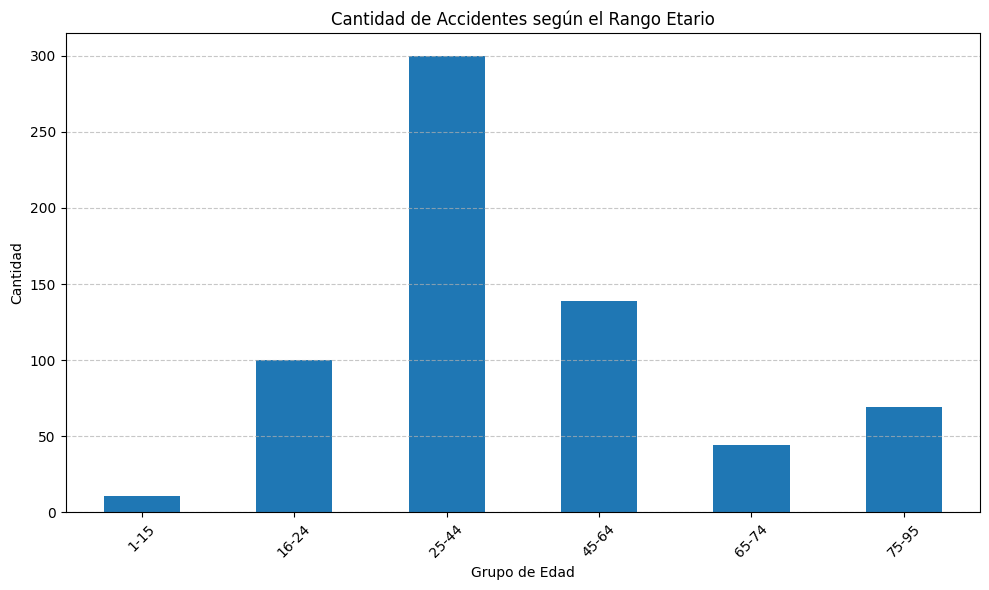

In [101]:
conteo_por_grupo = df_vic_filtrado['RANGO_ETARIO'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(10, 6))
conteo_por_grupo.plot(kind='bar')
plt.title('Cantidad de Accidentes según el Rango Etario')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El análisis del rango de edad de las víctimas en accidentes mortales revela ciertas tendencias importantes:

- 25-44 años: Este rango de edad muestra la mayor incidencia de accidentes mortales. Esto podría atribuirse a que las personas en este grupo de edad suelen estar activas en la fuerza laboral y, por lo tanto, pasan más tiempo en la carretera, aumentando su exposición al riesgo de accidentes. Además, es posible que los factores como la fatiga, el estrés y las responsabilidades familiares puedan contribuir a una conducción menos segura.
- 45-64 años: El segundo rango de edad con mayor incidencia de accidentes mortales es el grupo de 45 a 64 años. Esto podría deberse a que las personas en este rango de edad aún están activas en la fuerza laboral o pueden estar experimentando cambios en la salud que podrían afectar su capacidad para conducir de manera segura, como problemas de visión o audición, así como condiciones médicas crónicas.
- 16-24 años: Aunque ocupan el tercer lugar en la lista, es notable que los jóvenes de 16 a 24 años también estén representados entre las víctimas de accidentes mortales. Este grupo de edad tiende a ser menos experimentado en la conducción y puede estar más inclinado a comportamientos de riesgo, como el exceso de velocidad o la conducción distraída, lo que aumenta su vulnerabilidad en la carretera.

Estrategias como la educación vial dirigida a conductores jóvenes, programas de concienciación sobre los peligros de la conducción distraída y el consumo de alcohol, así como medidas para promover la seguridad en la carretera entre los conductores de mediana edad, pueden ayudar a reducir la incidencia de accidentes mortales en estos rangos de edad.

Para poder ver estos valores de una manera más facil se realiza un diagrama de torta con porcentajes

C:\Users\Jorge\AppData\Local\Temp\ipykernel_24164\535706816.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, title= 'Rango Etario' ,labels=conteo_por_grupo.index, loc="best", fontsize=12)


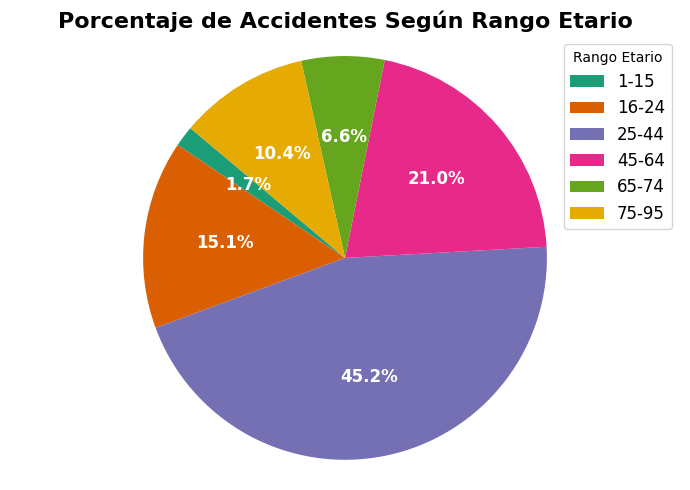

In [102]:
colores = plt.cm.Dark2.colors


plt.figure(figsize=(7,5))
patches, _, autotexts = plt.pie(conteo_por_grupo, labels=None, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title('Porcentaje de Accidentes Según Rango Etario', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.legend(patches, title= 'Rango Etario' ,labels=conteo_por_grupo.index, loc="best", fontsize=12)

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
    autotext.set_color('White')  

plt.tight_layout()
plt.show()

Con un 45.2%. Como se mencionó anteriormente, este grupo suele estar activo en la fuerza laboral y puede pasar más tiempo en la carretera, lo que aumenta su exposición al riesgo de accidentes. Los adultos de 45 a 64 años representan el 21% de los accidentes. Este grupo de edad también está representado en una proporción significativa de accidentes, lo que podría atribuirse a factores como la presencia de enfermedades crónicas que podrían afectar la capacidad de conducción y la participación en la fuerza laboral. Los jóvenes de 16 a 24 años representan el 15.1% de los accidentes. Aunque ocupan una proporción menor en comparación con los grupos de edad anteriores, aún son una parte significativa de los accidentes. Este grupo tiende a ser menos experimentado en la conducción y puede estar más inclinado a comportamientos de riesgo.

### Conclusiones finales

Las conclusiones consolidadas que incluyen todos los puntos mencionados anteriormente:

- Vulnerabilidad de los conductores y peatones: Se observa una alta incidencia de accidentes entre conductores y peatones, resaltando su vulnerabilidad en las vías. Esta vulnerabilidad es especialmente evidente en ciertos rangos de edad, como adultos jóvenes y adultos mayores.

- Tendencias por rango de edad: La distribución de accidentes varía según el rango de edad, con adultos de 25 a 44 años representando la mayoría de los accidentes. Sin embargo, también se observa una importante participación de jóvenes de 16 a 24 años, lo que indica una necesidad de atención específica en este grupo.

- Factores externos: La pandemia de COVID-19 ha tenido un impacto significativo en la seguridad vial, con una disminución en la cantidad de accidentes durante el año 2020 debido a las restricciones de bloqueo. Sin embargo, el retorno a niveles más altos de accidentes en 2021 sugiere la influencia de otros factores externos además de la pandemia, como cambios en el comportamiento del conductor o en las condiciones de tráfico.

- Diferencias entre participaciones de sexo en accidentes: Se observa una disparidad en la cantidad de víctimas masculinas y femeninas en accidentes de tráfico, con una prevalencia significativamente mayor de víctimas masculinas en todos los tipos de accidentes. Esto destaca la importancia de considerar las diferencias de género en las estrategias de seguridad vial.

- Incidencia de accidentes en motocicletas: Las motocicletas muestran una alta incidencia de accidentes mortales, lo que resalta la necesidad de implementar medidas específicas para mejorar la seguridad de los motociclistas y reducir la cantidad de accidentes en los que están involucrados.

- Variabilidad por comunas: Al analizar los datos por comunas, se observan diferencias en la cantidad de accidentes entre áreas geográficas, lo que subraya la importancia de adaptar las medidas de seguridad vial a las necesidades específicas de cada comunidad y área urbana.

### Renombrar Columna y Revisar sus datos antes de Exportar los df Finales

In [103]:
df_vic_filtrado = df_vic_filtrado.rename(columns={  'ID_hecho': 'ID_Hecho',
                                                    'FECHA': 'Fecha',
                                                    'AAAA': 'Año',
                                                    'MM': 'Mes',
                                                    'DD': 'Día',
                                                    'ROL': 'Rol',
                                                    'VICTIMA': 'Victima',
                                                    'SEXO': 'Sexo',
                                                    'EDAD': 'Edad',
                                                    'FECHA_FALLECIMIENTO': 'Fecha_Nacimiento',
                                                    'RANGO_ETARIO': 'Rango_Etario'})

In [104]:
df_hecho = df_hecho.rename(columns={ 'AAAA': 'Año',
                                            'MM': 'Mes',
                                            'DD': 'Día'})

In [105]:
df_vic_filtrado.head(5)

,ID_Hecho,Fecha,Año,Mes,Día,Rol,Victima,Sexo,Edad,Fecha_Nacimiento,Rango_Etario
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016,16-24
1,2016-0002,1/2/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016,65-74
2,2016-0003,1/3/2016,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016,25-44
3,2016-0004,1/10/2016,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD,16-24
4,2016-0005,1/21/2016,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2/1/2016,25-44


In [106]:
df_hecho.head(2)

,ID_Accidente,N_victima,Fecha,Año,Mes,Día,Hora,HH,Lugar,Tipo_de_calle,...,Altura,Cruce,Direccion_normalizada,Comuna,XY (CABA),pos x,pos y,Participante,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


In [107]:
tipo_datos(df_hecho)

,nombre_campo,tipo_datos
0,ID_Accidente,[<class 'str'>]
1,N_victima,[<class 'int'>]
2,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
3,Año,[<class 'int'>]
4,Mes,[<class 'int'>]
5,Día,[<class 'int'>]
6,Hora,[<class 'str'>]
7,HH,[<class 'int'>]
8,Lugar,[<class 'str'>]
9,Tipo_de_calle,[<class 'str'>]


In [108]:
tipo_datos(df_vic_filtrado)

,nombre_campo,tipo_datos
0,ID_Hecho,[<class 'str'>]
1,Fecha,[<class 'str'>]
2,Año,[<class 'int'>]
3,Mes,[<class 'int'>]
4,Día,[<class 'int'>]
5,Rol,[<class 'str'>]
6,Victima,[<class 'str'>]
7,Sexo,[<class 'str'>]
8,Edad,[<class 'int'>]
9,Fecha_Nacimiento,[<class 'str'>]


Realizo la Exportacion de mis DataSet de los 

In [109]:
# Ruta donde se guardará el archivo CSV Hecho
ruta_csv = os.path.join('DataSet_Limpios', 'df_hecho.csv')
df_hecho.to_csv(ruta_csv, index=False) 

In [110]:
# Ruta donde se guardará el archivo CSV Victima
ruta_csv = os.path.join('DataSet_Limpios', 'df_victima.csv')
df_vic_filtrado.to_csv(ruta_csv, index=False) 
